In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

Collect the dataset

In [ ]:
crop_df=pd.read_csv("/content/Crop_recommendation.csv")
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
crop_df.shape

(2200, 8)

In [ ]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#check null values are there or not

In [ ]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Exploratory Data Analysis
Descriptive Statistical

In [ ]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


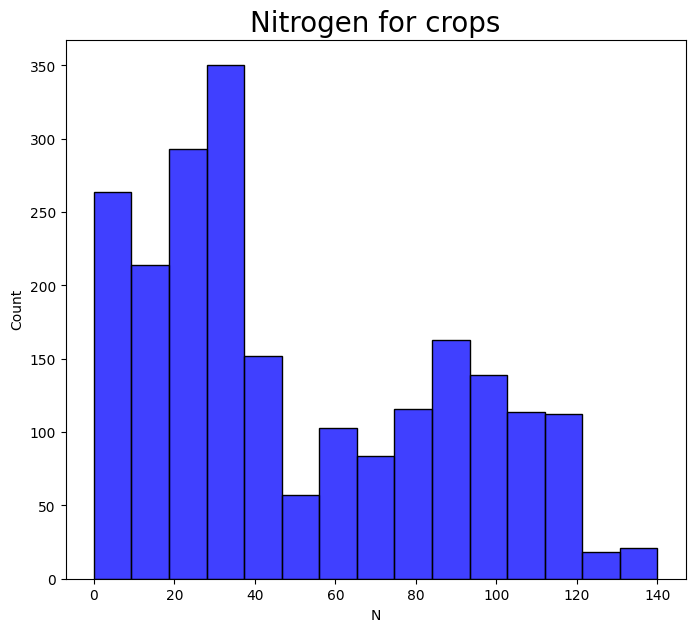

In [ ]:

#Nitrogen
plt.figure(figsize=(8,7))
sns.histplot(x='N',data=crop_df,color='b');
plt.title("Nitrogen for crops", {'fontsize':20});


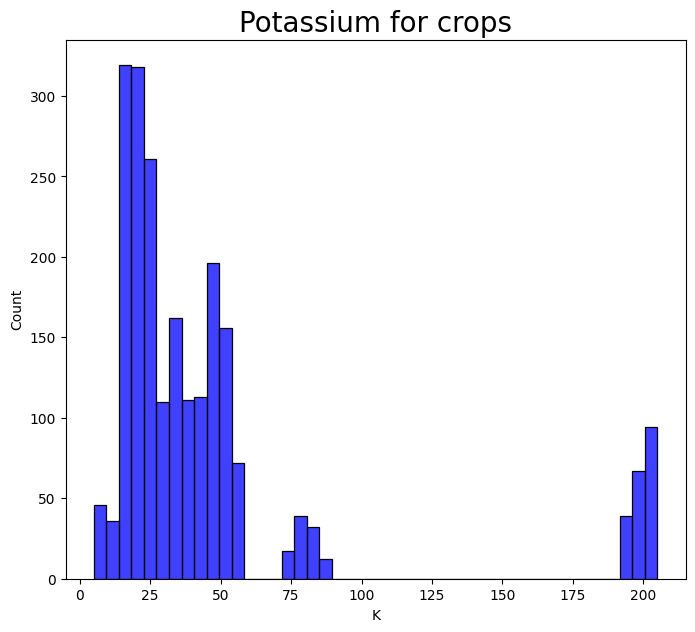

In [ ]:
#Potassium
plt.figure(figsize=(8,7))
sns.histplot(x='K',data=crop_df,color='b');
plt.title("Potassium for crops",{'fontsize':20});

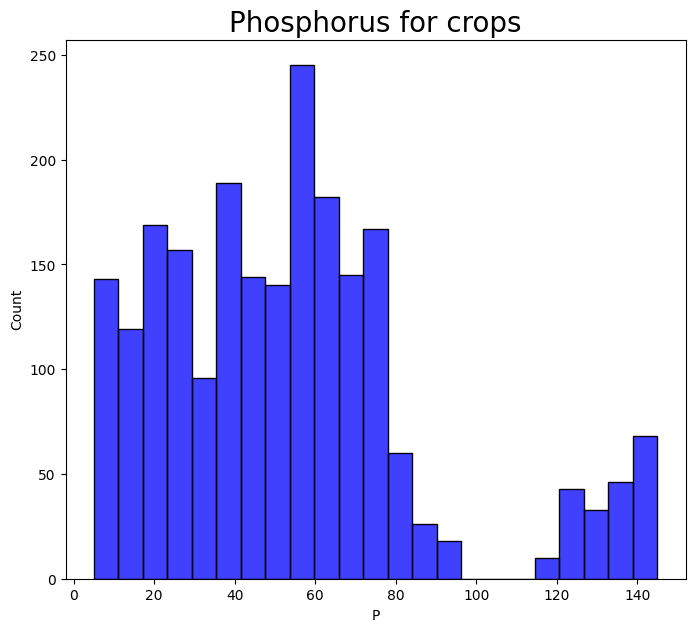

In [ ]:
#Phosphorus
plt.figure(figsize=(8,7))
sns.histplot(x='P',data=crop_df,color='b');
plt.title("Phosphorus for crops",{'fontsize':20});

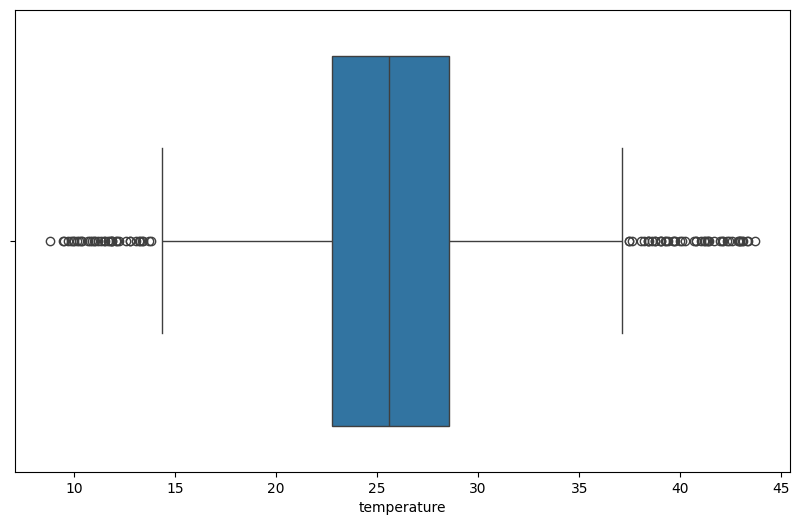

In [ ]:
#Temperature
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.temperature);



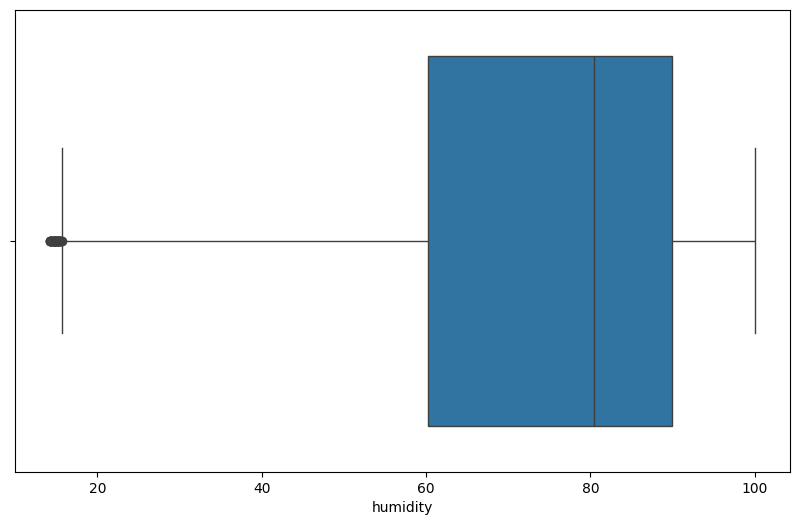

In [ ]:
#Humidity
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.humidity);

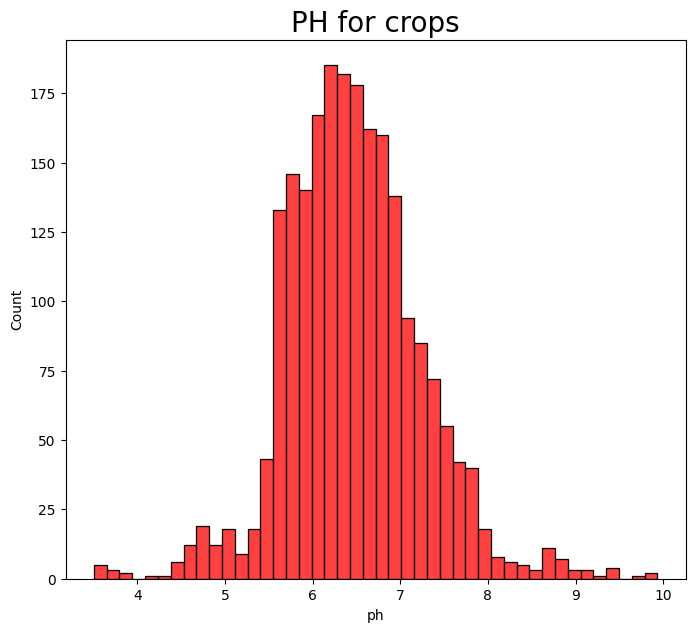

In [ ]:
#ph
plt.figure(figsize=(8,7))
sns.histplot(x='ph',data=crop_df,color='r')
plt.title("PH for crops",{"fontsize":20});

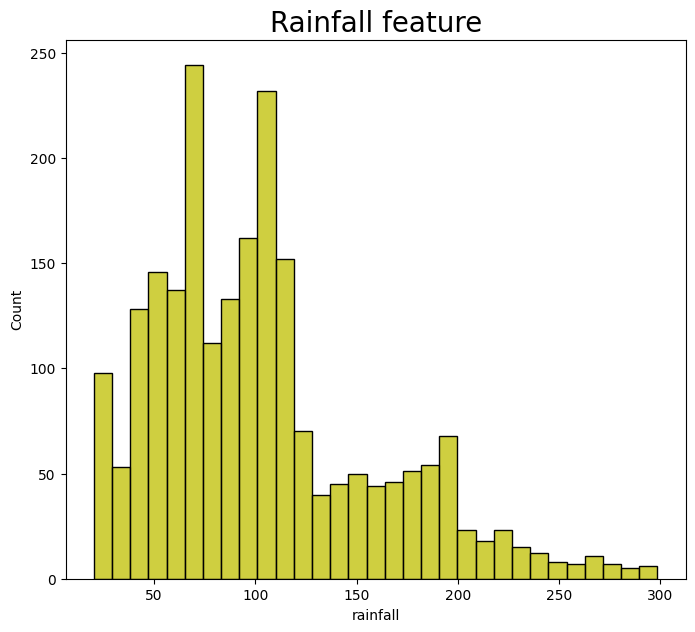

In [ ]:
#Rainfall
plt.figure(figsize=(8,7))
sns.histplot(x='rainfall',data=crop_df,color='y');
plt.title("Rainfall feature",{"fontsize":20});

<ipython-input-17-2301da862035>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_df['ph'])


<Axes: xlabel='ph', ylabel='Density'>

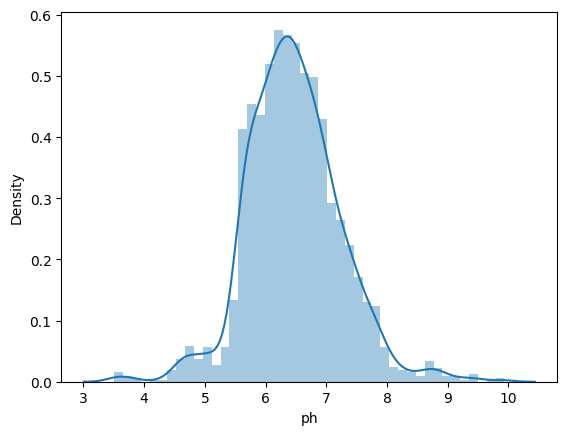

In [ ]:
sns.distplot(crop_df['ph'])

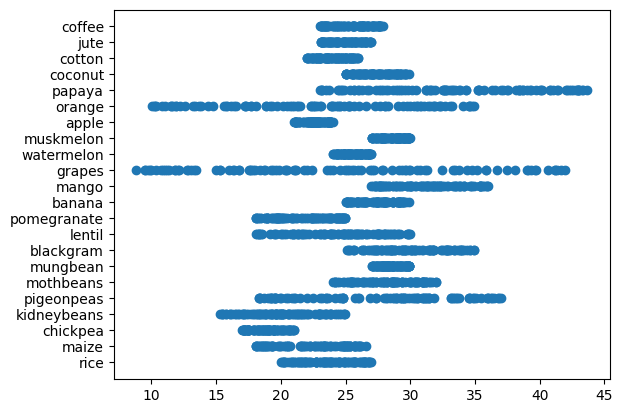

In [ ]:
plt.scatter(crop_df["temperature"],crop_df["label"])
plt.show()

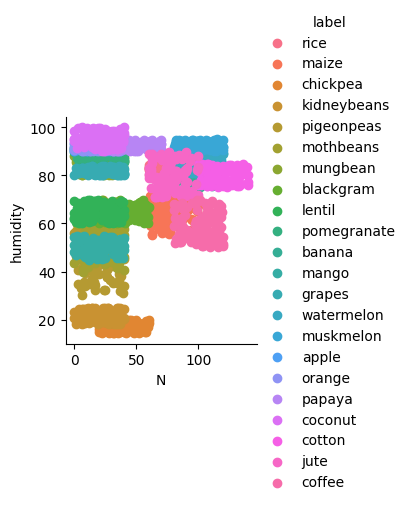

In [ ]:
sns.FacetGrid(crop_df,hue="label").map(plt.scatter,"N","humidity").add_legend()


In [ ]:
#get correlations of each features in dataset
import pandas as pd
#If crop_df is not already a DataFrame,convert it
if isinstance(crop_df,np.ndarray):
    crop_df=pd.DataFrame(crop_df)
#Calculate the correlation matrix
corrmat=crop_df.select_dtypes(include=['number']).corr()
#Apply the background gradient styling
corrmat.style.background_gradient('coolwarm')

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


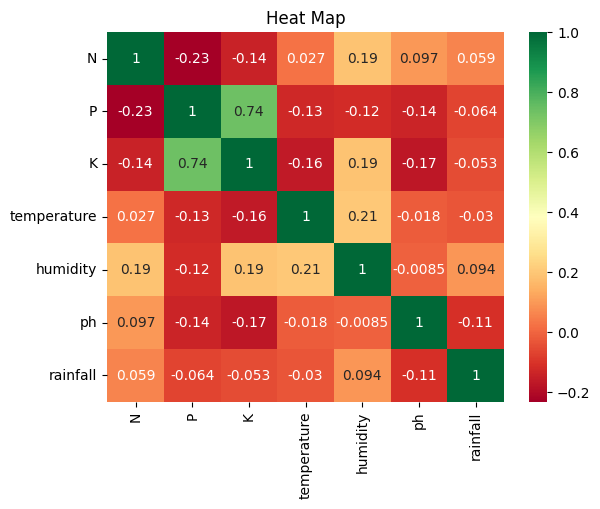

In [ ]:
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title("Heat Map")
plt.show()

In [ ]:
sns.pairplot(crop_df,hue="label",size=3)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
#X consists of independent variables
X=crop_df.drop(['label','temperature'],axis=1)
#y consists of dependent variable "label"
y=pd.Categorical(crop_df.label)



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Model Building
Training the model in multiple Algorithms

In [ ]:
#K-Nearest-Neighbors Classifier
knnclassifier=KNeighborsClassifier(n_neighbors=9)
knnclassifier.fit(X_train,y_train)
print("The accuracy of K Nearest Neighbors Classifier is",
      knnclassifier.score(X_train,y_train),knnclassifier.score(X_test,y_test))
knn=[knnclassifier.score(X_train,y_train),knnclassifier.score(X_test,y_test)]


The accuracy of K Nearest Neighbors Classifier is 0.9852272727272727 0.9795454545454545


In [ ]:
#Support Vector Machines Classifier
svm=SVC()
svm.fit(X_train,y_train)
print("The accuracy of SVM is",
      svm.score(X_train,y_train),svm.score(X_test,y_test))
svm=[svm.score(X_train,y_train),svm.score(X_test,y_test)]

The accuracy of SVM is 0.9801136363636364 0.9795454545454545


In [ ]:
#Decision Tree Classifier Model
dtclassifier=DecisionTreeClassifier(max_depth=7)
dtclassifier.fit(X_train,y_train)
print("The accuracy of Decision Tree Classifier is",
    dtclassifier.score(X_train,y_train),dtclassifier.score(X_test,y_test))
dt=[dtclassifier.score(X_train,y_train),dtclassifier.score(X_test,y_test)]



The accuracy of Decision Tree Classifier is 0.7840909090909091 0.7545454545454545


In [ ]:
#Random Forest Classifier Model
rfclassifier=RandomForestClassifier()
rfclassifier.fit(X_train,y_train)
print("The accuracy of random forest Classifier is",
     rfclassifier.score(X_train,y_train),rfclassifier.score(X_test,y_test))
rf=[rfclassifier.score(X_train,y_train),rfclassifier.score(X_test,y_test)]

The accuracy of random forest Classifier is 1.0 0.9977272727272727


Testing models with multiple evaluation metrics

In [ ]:
knnclassifier=KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)
y_pred=knnclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        19
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        26
        jute       1.00      0.91      0.95        22
 kidneybeans       0.82      1.00      0.90        14
      lentil       1.00      0.95      0.98        21
       maize       0.94      1.00      0.97        16
       mango       1.00      1.00      1.00        15
   mothbeans       0.95      1.00      0.98        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [ ]:
dtclassifier=DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)

y_pred=dtclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        19
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        23
      cotton       1.00      0.96      0.98        27
      grapes       1.00      1.00      1.00        26
        jute       0.95      0.91      0.93        22
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        21
       maize       0.94      1.00      0.97        16
       mango       1.00      1.00      1.00        15
   mothbeans       0.95      0.95      0.95        21
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [ ]:
rfclassifier=RandomForestClassifier()
rfclassifier.fit(X_train,y_train)

y_pred=rfclassifier.predict(X_test)
print(classification_report(y_test,y_pred))

Model Deployment
Save the best model

In [ ]:
#open a file, where you want to store the data
pickle.dump(knnclassifier,open('model.pkl','wb'))

Integrate with web framework

In [ ]:
from flask import Flask,render_template,request
import numpy as np
import pickle
import pandas as pd


In [ ]:
model=pickle.load(open('model.pkl','rb'))
app=Flask(__name__)

In [ ]:
@app.route("/")
def home():
    return render_template('index.html')

In [ ]:
@app.route('/details')
def pred():
    return render_template('details.html')

In [ ]:
@app.route('/crop_predict',methods=['GET','POST'])
def crop_prediction():
  #loading model which we saved
  N=float(request.form['N'])
  P=float(request.form['P'])
  K=float(request.form['K'])
  temperature=float(request.form['temperature'])
  humidity=float(request.form['humidity'])
  ph=float(request.form['ph'])
  rainfall=float(request.form['rainfall'])
  prediction=model.predict(pd.DataFrame([[N,P,K,temperature,humidity,ph,rainfall]],columns=['N','P','K','temperature','humidity','ph','rainfall']))
  return "Prediction result"


if __name__=="__main__":
  app.run()
